<a href="https://colab.research.google.com/github/Subramaniya-pillai/nn-classification-ex-2-DL/blob/main/ex_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

customer_data=pd.read_csv("customers.csv")

In [ ]:
customer_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [ ]:
customer_data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
customer_data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
customer_data.shape

(10695, 11)

In [ ]:
customer_data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
customer_data_cleaned=customer_data.dropna(axis=0)

In [ ]:
customer_data_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
customer_data_cleaned.shape

(8819, 11)

In [ ]:
customer_data_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
customer_data_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
customer_data_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
customer_data_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
customer_data_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
customer_data_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
customer_data_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
customer_data_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
categories_list=[['Male','Female'],['Yes','No'],['Yes','No'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],['Low', 'High', 'Average']]



In [ ]:
enc=OrdinalEncoder(categories=categories_list)

In [ ]:
customer_1=customer_data_cleaned.copy()

In [ ]:
customer_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]=enc.fit_transform(customer_1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])

In [ ]:
customer_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
le=LabelEncoder()

In [ ]:
customer_1['Segmentation']=le.fit_transform(customer_1['Segmentation'])

In [ ]:
customer_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [ ]:
customer_1=customer_1.drop('ID',axis=1)
customer_1=customer_1.drop('Var_1',axis=1)

In [ ]:
customer_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
corr=customer_1.corr()

In [ ]:
customer_1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,1.0,22,1.0,0.0,1.0,0.0,4.0,3
2,1.0,0.0,67,0.0,1.0,1.0,0.0,1.0,1
3,0.0,0.0,67,0.0,2.0,0.0,1.0,2.0,1
5,0.0,0.0,56,1.0,3.0,0.0,2.0,2.0,2
6,0.0,1.0,32,0.0,0.0,1.0,0.0,3.0,2
...,...,...,...,...,...,...,...,...,...
10689,1.0,1.0,35,0.0,6.0,1.0,0.0,2.0,3
10690,0.0,1.0,29,1.0,0.0,9.0,0.0,4.0,1
10691,1.0,1.0,35,0.0,4.0,1.0,0.0,1.0,0
10693,0.0,0.0,47,0.0,8.0,1.0,1.0,5.0,2


In [ ]:
X=customer_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [ ]:
y1=customer_1[['Segmentation']].values

In [ ]:
y1[10]


array([1])

In [ ]:
one_hot_enc=OneHotEncoder()

In [ ]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [ ]:
y1.shape

(8819, 1)

In [ ]:
y=one_hot_enc.transform(y1).toarray()

In [ ]:
y.shape

(8819, 4)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [ ]:
X_train[0]

array([ 1.,  0., 85.,  1.,  2.,  0.,  0.,  1.])

In [ ]:
X_train.shape

(5908, 8)

In [ ]:
X_test.shape

(2911, 8)

In [ ]:
scaler_age=MinMaxScaler()

In [ ]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train_scaled=np.copy(X_train)
X_test_scaled=np.copy(X_test)

In [ ]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [ ]:
ai = Sequential([Dense(50,input_shape = [8]),
                 Dense(40,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(20,activation="relu"),
                 Dense(4,activation="softmax")])

In [ ]:
ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max', 
    verbose=1, 
    patience=20)

In [ ]:
ai.fit( x = X_train, y = y_train,
        epochs=500, batch_size=256,
        validation_data=(X_test,y_test),
        callbacks = [early_stop]
        )

Epoch 1/500
24/24 [==============================] - 2s 15ms/step - loss: 1.6020 - accuracy: 0.3116 - val_loss: 1.3491 - val_accuracy: 0.3281
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3205 - accuracy: 0.3604 - val_loss: 1.3141 - val_accuracy: 0.3669
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: 1.2945 - accuracy: 0.3785 - val_loss: 1.3132 - val_accuracy: 0.3992
Epoch 4/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2757 - accuracy: 0.4093 - val_loss: 1.2802 - val_accuracy: 0.3861
Epoch 5/500
24/24 [==============================] - 0s 6ms/step - loss: 1.2635 - accuracy: 0.4030 - val_loss: 1.2922 - val_accuracy: 0.3896
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 1.2625 - accuracy: 0.4098 - val_loss: 1.2869 - val_accuracy: 0.4143
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2668 - accuracy: 0.4052 - val_loss: 1.2918 - val_accuracy: 0.4019
Epoch 8/500


In [ ]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()



,loss,accuracy,val_loss,val_accuracy
0,1.602002,0.311611,1.349125,0.328066
1,1.320540,0.360359,1.314143,0.366884
2,1.294527,0.378470,1.313205,0.399176
3,1.275713,0.409276,1.280174,0.386122
4,1.263500,0.403013,1.292165,0.389557


Text(0.5, 1.0, 'Training Loss, Validation Loss Vs Iteration')

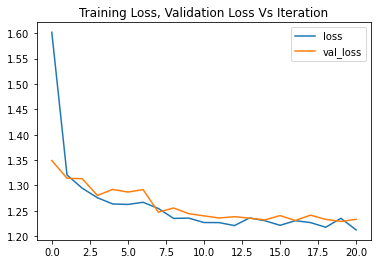

In [ ]:
metrics[['loss','val_loss']].plot()
plt.title('Training Loss, Validation Loss Vs Iteration')

Text(0.5, 1.0, 'Accuracy, Validation Accuracy Vs Iteration')

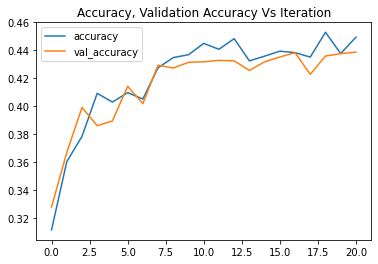

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.title('Accuracy, Validation Accuracy Vs Iteration')

In [ ]:
x_pred = np.argmax(ai.predict(X_test), axis=1)
x_pred.shape

y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

91/91 [==============================] - 0s 1ms/step


(2911,)

In [ ]:
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

conf(y_truevalue,x_pred)

array([[479,   6, 111, 161],
       [398,   5, 193,  90],
       [269,   3, 325,  89],
       [269,   3,  42, 468]])

In [ ]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.34      0.63      0.44       757
           1       0.29      0.01      0.01       686
           2       0.48      0.47      0.48       686
           3       0.58      0.60      0.59       782

    accuracy                           0.44      2911
   macro avg       0.42      0.43      0.38      2911
weighted avg       0.43      0.44      0.39      2911



In [ ]:
import pickle

# Saving the Model
ai.save('customer_classification_model.h5')

In [ ]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train,y_train,X_test,y_test,customer_data,customer_data_cleaned,scaler_age,enc,one_hot_enc,le], fh)

In [ ]:
ai_brain = load_model('customer_classification_model.h5')

In [ ]:
with open('customer_data.pickle', 'rb') as fh:
   [x_train,y_train,X_test,y_test,customer_data,customer_data_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [ ]:
x_prediction = np.argmax(ai_brain.predict(X_test[1:2,:]), axis=1)

print(x_prediction)

print(le.inverse_transform(x_prediction))

1/1 [==============================] - 0s 72ms/step
[0]
['A']
